# Sample and Statistical Inference

**If you are a Colab user**

If you use Google Colab, you can uncomment the following cell to mount your Google Drive to Colab. <br>
After that, Clab can read/write files and data in your Google Drive <br>

please change the current directory to be the folder that you save your Notebook and <br>
data folder. For example, I save my Colab files and data in the following location

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#%cd /content/drive/MyDrive/Colab\ Notebooks

**Set up standards for the remainder of the notebook**

**Install new libraries**

If you didn't install geopandas and contextily when you worked on the homework for data visualization, now you can install them to the envrionment CIV355

GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. 
https://geopandas.org/en/stable/

contextily is a small Python 3 (3.10 and above) package to retrieve tile maps from the internet.
https://contextily.readthedocs.io/en/latest/

You can run the following code in terminal or uncomment the next cell and direcdtly run the code in this notebook

*conda install geopandas contextily*

So far, we have installed

- jupyter notebook
- numpy
- pandas
- matplotlib
- seaborn
- plotly
- scipy
- openpyxl
- geopandas
- contextily

In [2]:
#!pip3 install geopandas contextily

In [3]:
# import required libraries and modules, and define default setting for the notebook
import numpy as np # a foundamental package for scientific computing https://numpy.org/
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import pandas as pd # a library of data analysis, https://pandas.pydata.org/
from pandas import Series, DataFrame # import modules into the local namespace if they are frequently used

import matplotlib.pyplot as plt # is a package for data visulization, https://matplotlib.org/
plt.rc("figure", figsize=(8, 6))

import seaborn as sns # a module for data visualization, https://seaborn.pydata.org/index.html

import scipy as sp

import geopandas as geopd # 
import contextily as ctx

# to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


from IPython.display import display, HTML

# Expand all outputs so that scrollbars are removed
display(HTML('''
<style>
.output_scroll {
    height: auto !important;
    max-height: none !important;
}
</style>
'''))


## Import and Review California Housing Data

CA_housing.csv dataset pertains to the houses found in a given California
district and some summary stats about them based on the year 1990 census data.
The dataset contains 20,640 observations and 10 columns

Below is a list of the 9 attributes (X) with their discription

  --Longitude: block group longitude\
  --Latitude block group latitude\
  --HouseAge: median house age in block group\
  --AveRooms: average number of rooms per household\
  --AveBedrms: average number of bedrooms per household\
  --Population: block group population\
  --AveOccup: average number of household members\
  --MedInc: Median income for households within a block\
  --OceanProx: Location of the house w.r.t ocean/sea

The target (y) is:\
--MedVal: Median house value for households within a block


Suggested Exercises:
1. read the dataset CA_housing.csv into your workspace as a DadaFrame
2. Review teh first few rows and develop an understanding of the dataset [either use .head() or .info()]
3. Visualize the distributions of numerical variables as historgrams. What observations ydo ou have?
4. Calculate the distribution of the categorical variables using .value_counts(). What observations do you have?
5. Please show the geographical distribution of houses CA. Color data points according to the median house value. Do you observe any patterns about the median value of houses in CA? [Hint: scatter plot of data points using longtitude and lattitude]. 
6. Please show the geographical distriubtion of houses in CA. Color data points according the the proximity to the ocean. 
7. According to the result in step 6, can you change OceanProx into an ordered categorical variable according the proximity to the ocean? Then, redo the geographical distribution of houses in step 6.


In [4]:
# read the Housing dataset
CA_housing=pd.read_csv("Data/CA_housing.csv")

# review the first five rows
CA_housing.head()

# review information about the dataset
CA_housing.info()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,OceanProx,MedVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,NEAR BAY,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,NEAR BAY,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,NEAR BAY,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,NEAR BAY,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,NEAR BAY,342200.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   OceanProx   20640 non-null  object 
 9   MedVal      20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


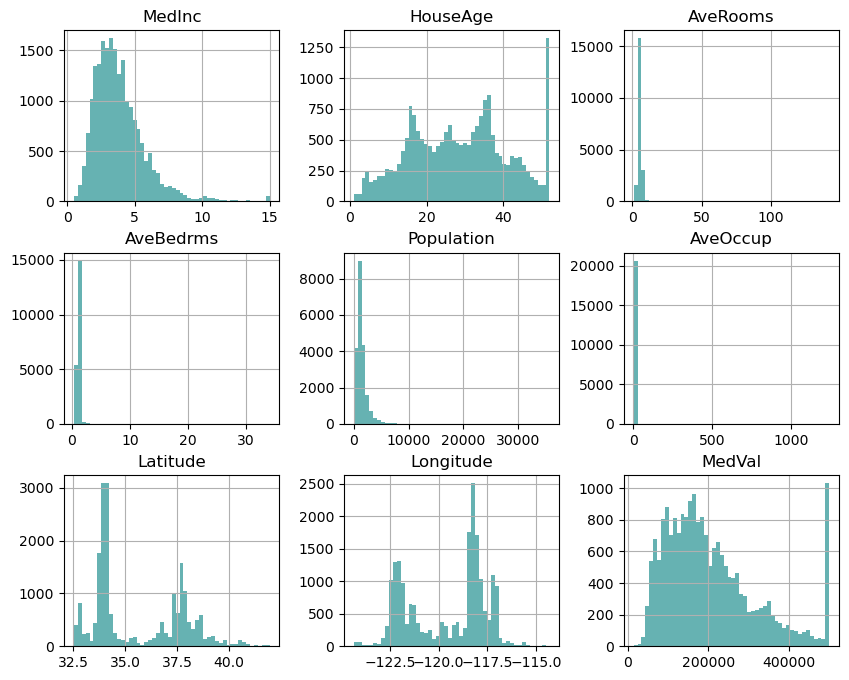

In [5]:
# show the distributions of the nine numerical columns
CA_housing.hist(bins=50, 
                figsize=(10,8),
                color='teal',
                alpha=0.6)
plt.show();

In [6]:
# OceanProx is a categorical attribute. Let's take a look at its distribution
CA_housing["OceanProx"].value_counts()

OceanProx
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
# OceanProx should be an ordered categorical variable. Let's convert it.
ordered_categories = ['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']
CA_housing['OceanProx'] = pd.Categorical(CA_housing['OceanProx'], 
                                         categories=ordered_categories, 
                                         ordered=True
                                        )

# Create a cateborical-number mapping dictionary, and add a new column "OceanProx_num" to CA_housing
OCEANPROX_TO_NUM = {cat: i for i, cat in enumerate(ordered_categories)}  # this generate a dictionary mapping OceanProx in category to number, {INLAND:1, NEAR BAY: 2,...}
# Create a new column that maps categories to integers
CA_housing['OceanProx_num'] = CA_housing['OceanProx'].map(OCEANPROX_TO_NUM).astype(int)

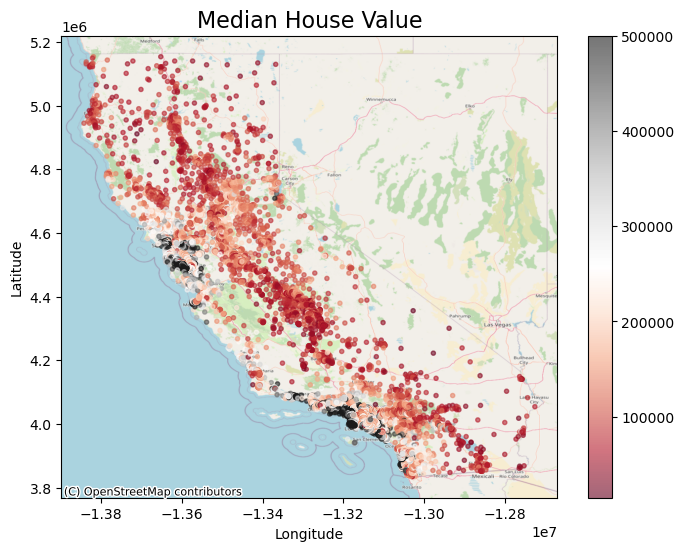

In [8]:
# Let's take a look at the spatial distribution of the data. We use color to indicate the median house value

# Convert to GeoDataFrame
df_geo = geopd.GeoDataFrame(CA_housing, 
                            geometry=geopd.points_from_xy(CA_housing.Longitude, CA_housing.Latitude), 
                            crs="EPSG:4326")  #crs means Coordinate Reference System, #WGS84 latitude/longitude in degree. 4326 is just the EPSG identifier of WGS84.


# Convert to Web Mercator (EPSG:3857) for plotting with contextily by reprojecting all the geometries into a new coordinate system.
# After the conversion, instead of storing pickup locations in latitude/longitude, they are stored in x/y meters on a flat Web Mercator grid.
df_geo = df_geo.to_crs(epsg=3857) #PSG:3857 = Web Mercator projection (used by most web maps like Google Maps, OpenStreetMap, Mapbox).


#create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

sc = ax.scatter(df_geo.geometry.x, df_geo.geometry.y, 
                c=CA_housing.MedVal, cmap='RdGy', alpha=0.6, marker='.')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Median House Value',size=16)

plt.colorbar(sc)

plt.show();

# The figure shows that expensive houses are along the coast 

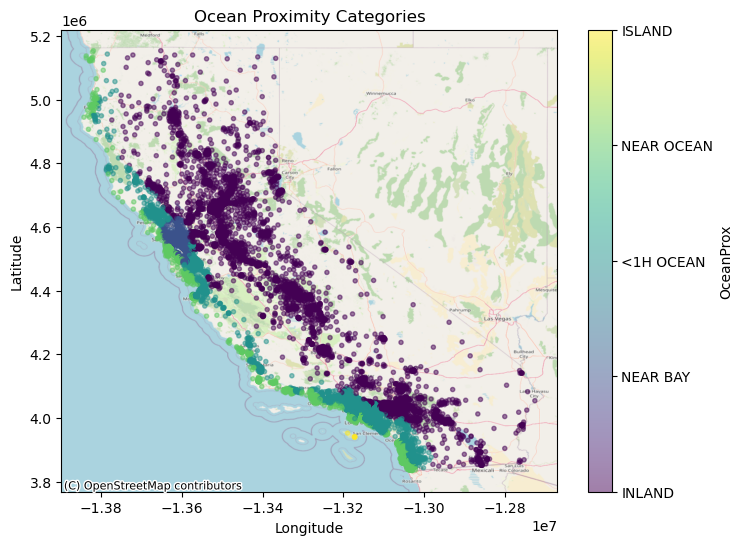

In [9]:
#create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

sc = ax.scatter(df_geo.geometry.x, 
                df_geo.geometry.y, 
                c=df_geo.OceanProx_num, # color indicates the OceanProx
                cmap='viridis', 
                alpha=0.5, 
                marker='.')

ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Ocean Proximity Categories')

# Create colorbar with categorical labels
cbar = plt.colorbar(sc, ax=ax, ticks=range(len(ordered_categories)))
cbar.ax.set_yticklabels(ordered_categories, size=10)
cbar.set_label('OceanProx')


plt.show();

# Wblocks now are differentiated by their proximity to the Ocean

## Sampling

A *census* collects data from every element in the population of interest. 

What is a well-known census you have seen? 

There are many potential difficulties  associated with taking a census. For example, it is expensive, timing consuming, possibly misleading, unnecessary, impractical to list a few.

**From a Finite Population** <br>A *simple random sample* of size $n$ from a finite population of size $N$ without replacement is a sample selected such that each possible sample of size $n$ has the same probability of being selected. There are $N \choose{n}$ possible samples in total.

**From an Infinite Population** <br> A simple random sample of size $n$ from an infinite population is a sample that each element is selected independently from the same population.

**Other sampling strategies**<br>
The strategy of  simple random sampling may not work well in certain scenarios. For example,  sampling data from a distribution with long tails using the simple sampling strategy may miss samples in the long tails. Readers who need other suitable sampling methods such as stratified sampling and cluster sampling can study relevant chapters in the following textbooks:

Lohr, Sharon L. Sampling: design and analysis. Chapman and Hall/CRC, 2021.

Groves, Robert M., Floyd J. Fowler Jr, Mick P. Couper, James M. Lepkowski, Eleanor Singer, and Roger Tourangeau. Survey methodology. John Wiley & Sons, 2011.

Suggested Exercise

1. generate a random sample of size 1000 without replacement [hint: .sample(samplesize,replace=False)]


In [21]:
# Generate a random sample of size 1000 without replacement)
X = CA_housing.sample(1000,
                      replace=False,# when replacement = False, a data point won't appear more than one time in a sample
                      random_state = 355) # select a random_state will ensure the result can be reproduced

## Statistical Inference

Given a sample $X_1,\dots,X_n\sim F$,  how do we infer the distribution $F$?

*Statistical inference* is the process of using a sample of data to infer the distribution $F$ that generates the data.  



We may infer only some features of $F$ such as its mean. 


**Parametric Model**<br>
A parametric model is a set of statistical models that can be characterized by a finite set of parameters:
\begin{equation}
\mathcal{S}=\{f(x;\pmb{\theta}),\; \pmb{\theta}\in \pmb{\Theta})\}. \tag{1}
\end{equation}
where $\pmb{\theta}$ is the set of unknown parameters that can take value from the space $\pmb{\Theta}$. 

For example,  if we assume data are from a normal distribution, then the model is
\begin{equation}
    \mathcal{S}=\left\{f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}, \;\mu\in \mathbb{R},\,\sigma\in \mathbb{R}^{+} \right\}. \tag{2}
\end{equation}
Given a sample drawn from the distribution $F$,  we would like to infer the unknown parameters $\mu$ and $\sigma$.

**Nonparametric Model**<br>
A nonparametric model is one that cannot be characterized by parameters.  For example,  the set of any cumulative distribution functions is a nonparametric model.  Given a sample, how to estimate the distribution $F$ with a nonparametric function?



Inference problems can be one of three types: 
- estimation,
- confidence sets, and
- hypothesis testing.

This course will touch all of them in different learning modules. In this Section, we will introduce those briefly, which is developed based on the following reference: <br>
Wasserman, Larry. All of statistics: a concise course in statistical inference. Springer Science & Business Media, 2013.


## Point Estimation

*Point estimation* provides a single best estimate of some quantity of interest, such as a parameter in a parametric model,  a cumulative distribution function (cdf) $F$,  a regression function, and others.

Let $\theta$ be a quantify of interest. $\hat{\theta}_n$ is a *point estimator* of $\theta$ using a sample of size $n$ drawn from its distribution.  The difference between them is
\begin{equation}
\epsilon(\hat{\theta}_n)=\theta-\hat{\theta}_n, \tag{3}
\end{equation}
is the *bias* of the estimator.  If the expectation of the bias is zero, the point estimator is an unbiased estimator.

In the following,  we introduce a few commonly used point estimators. 


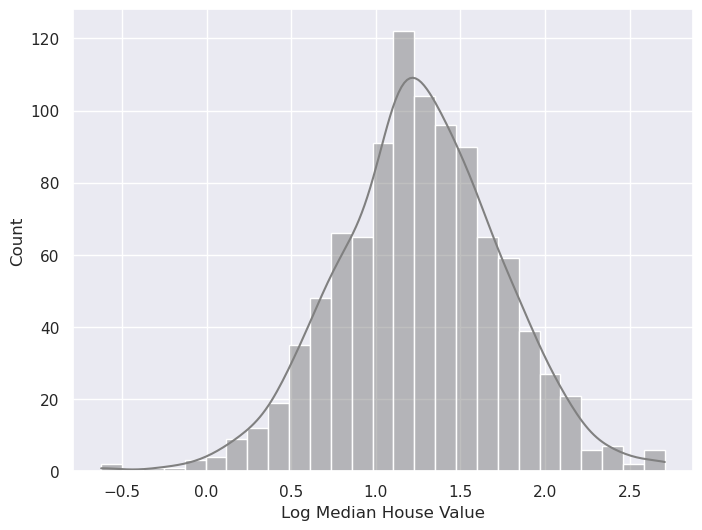

In [22]:
# Let's study the attribute log(MedVal) using this sample. 
# We found that MedVal is close to a lognormal distribution. Therefore, we apply the log function and then estimate the model parameters
MedValLog = np.log(X.MedVal)

# show the distribution. 
ax = sns.histplot(data=MedIncLog, 
             kde=True,
             color='grey')
sns.set_theme(rc={'figure.figsize':(8,6)}) 
ax.set_xlabel('Log Median House Value')
plt.show();

### Sample Mean

$\mu$ is the mean of a distribution $F(x)=P\{X<x\}$. $X_1,\dots,X_n$ is a sample drawn from the distirbution. The *sample mean*, denoted by $\overline{X}$, is an unbiased point estimator of $\mu$:
\begin{equation}
\overline{X}=\frac{\sum_{i=1}^{n} X_i}{n}.  \tag{4}
\end{equation}
because $\text{E}(\overline{X})=\mu$. 

<br>

MedVal is a quantity meaning the median house value in a survey block.  Consider the log function of this variable,  log(MedVal), as a quantity of interest. Can you generate a random sample of size 1,000 from the California Housing dataset and then use this sample to estimate its mean? The numerical values that you get are the *point estimate*. 

In [45]:
# sample mean of MedValLog
smn=MedValLog.mean()
print(f'The sample mean of the log median house value is {smn:,.2f}')

The sample mean of the log median house value is 12.09


### Sample Standard Deviation

$\sigma$ is the standard deviation of a distribution $F$. $X_1,\dots,X_n$ is a sample drawn from the distirbution. The *sample standard deviation*, denoted by $S$, is an unbiased point estimator of $\sigma$:
\begin{equation}
S=\sqrt{\frac{\sum_{i=1}^n (X_i-\overline{X})^2}{n-1}},  \tag{5}
\end{equation}
which is an unbiased point estimator of $\sigma$. 

<br>

Can you generate a random sample of size 1,000 from the California Housing dataset and then use this sample to estimate its standard deviation?


In [46]:
# Let's study the attribute log(MedVal) using this sample
MedValLog = np.log(X.MedVal)

# sample standard devaition of MedVal
ss=MedValLog.std(ddof=1)
print(f'The sample standard deviation of log median house value is {ss:.2f}')

The sample standard deviation of log median house value is 0.58


### Sample Proportion


**Sample Proportion**<br>
Consider a Bernoulli distribution.  The probability of success is $p$.  


$\overline{p}$ is a point estimator based on a sample of size $n$, $X_1,\dots, X_n$.   

Define
\begin{equation}
X_i=\left\{
\begin{array}{ll}
1,  &\text{with probability}\, p;\\
0, &\text{with probability}\, 1-p.\\
\end{array}
\right. \tag{6}
\end{equation}
where 1 means success. 

The sample proportion
\begin{equation}
\overline{p}=\frac{\sum_{i=1}^n X_i}{n}. \tag{7}
\end{equation}
where $\overline{p}$
is an unbiased point estimator of the parameter $p$ for the Bernoulli distribution. 


<br>

A survey block is "NEAR OCEAN" if it satisfies certain classification criteria. Let $p$ be the probability that a randomly selected survey block is in the category of "NEAR OCEAN". Can you generate a simple random sample of size 1,000 and use the sample to estimate that parameter? Again, the numerical value you get is the point estimate.

In [30]:
# sample proportion of blocks that are 'NEAR OCEAN'
spr=(X.OceanProx=='NEAR OCEAN').mean()
print(f'The sample proportion of blocks that are "NEAR OCEAN" is {spr:.3f}')

The sample proportion of blocks that are "NEAR OCEAN" is 0.138


## Sampling Distribution

If we change from one random sample to another,  the point estimate of an interested quantity is changing.  A point estimator is a random variable! 
What is the distribution of a point estimator?

### Distribution of Sample Mean


-  When the quantify of interest has a normal distribution, the sampling distribution of sample mean is normally distributed for any sample size.
-  When it does not have a normal distribution, the central limit theorem is helpful in identifying the shape of the sampling distribution of sample mean.

Let's calculate the mean and standard deviation of sample mean. 
 
The expected value of  sample mean is

\begin{equation}
    \text{E}[\overline{X}]=\text{E}\left[\frac{X_1+\dots,X_n}{n}\right]=\mu. \tag{8}
\end{equation}

That is, the expectation of sample mean is unbiased.

The variance of sample mean is
\begin{equation}
\text{Var}[\overline{X}]=\text{Var}\left[\frac{X_1+\dots+X_n}{n}\right]=\frac{\sigma^2}{n}, \tag{9}
\end{equation}
which reduces  when the sample size $n$is increasing.

The Finite Population Correction (FPC) factor captures the difference between sampling with replacement (it is often true for studying a finite population) and sampling without replacement (it is true for an infinite population or the population size is very large). When the sample size is large, for example more than 5\% of the population, the FPC is needed  because  the Central Limit Theorem does not hold and the standard error of the estimate  will be too big.  FPC for the sample variance is calculated as $(N-n)/(N-1)$. We multiple the sample variance in Equation (9) with this factor if the sample size $n$ is relatively big compared to the population size $N$. 







Let's generate 2000 random samples of log(MedVal) in size 1000, and check the distribution of sample mean

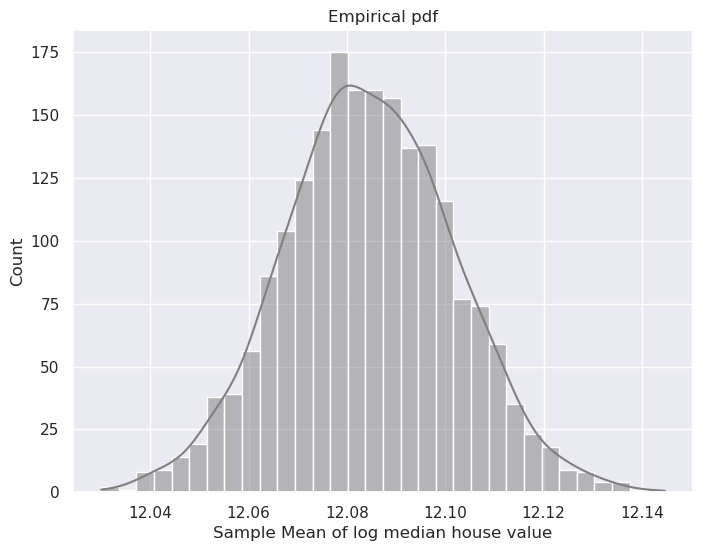

In [37]:
n = 1000 # sample size
m=2000 # repeats

# log(CA_housing.MedVal)
MedValLog_all = np.log(CA_housing.MedVal)

samples = np.stack([MedValLog_all.sample(n,replace=False) for _ in range(m)],axis=0) # Each row is a sample of 1,000 from the population
smn = samples.mean(axis=1) # mean of each sample

# show the ditribution of sample mean. What probability distribution does it look like?
sns.set_theme(rc={'figure.figsize':(8,6)})

ax = sns.histplot(data=smn, 
             kde=True,
             color='grey')

ax.set_title('Empirical pdf')
ax.set_xlabel('Sample Mean of log median house value')
plt.show();

### Distribution of Sample Variance

Sample variance,  as a point estimator of variance,  is also a random variable.  It follows a chi-squared distribution with $n-1$ degrees of freedom because
\begin{equation}
S^2 = \sum_{i=1}^n
\frac{(X_i-\overline{X})^2}{n-1}
=\frac{\sigma^2}{n-1}\sum_{i=1}^n \left(\frac{X_i-\overline{X}}{\sigma}\right)^2\sim\chi^2 (n-1). \tag{10}
\end{equation}


Let's generate 2000 random samples of log(MedVal) in size 1000, and check the distribution of sample variance.

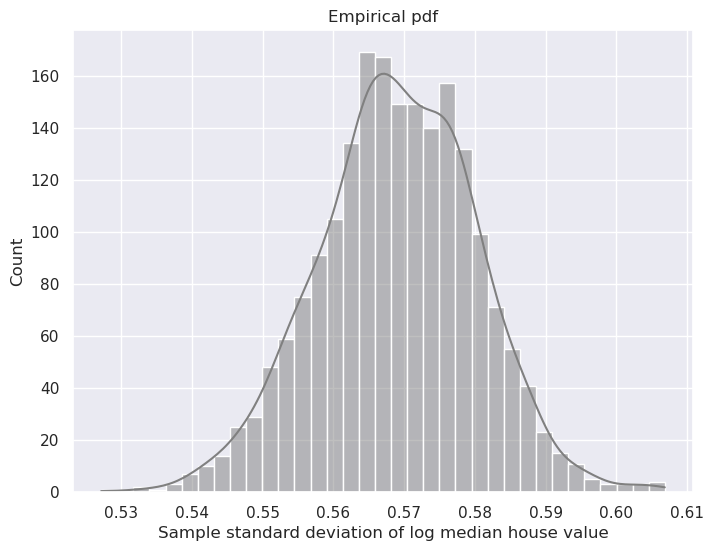

In [38]:
n = 1000 # sample size
m=2000 # repeats

# log(CA_housing.MedInc)
MedValLog_all = np.log(CA_housing.MedVal)

samples = np.stack([MedValLog_all.sample(n,replace=False) for _ in range(m)],axis=0) # Each row is a random sample of 1,000 from the population
sv = samples.std(ddof=1, axis=1) # standar deviation of each sample

# show the ditribution of sample standard. What probability distribution does it look like?
sns.set_theme(rc={'figure.figsize':(8,6)})

ax = sns.histplot(data=sv, 
             kde=True,
             color='grey')

ax.set_title('Empirical pdf')
ax.set_xlabel('Sample standard deviation of log median house value')
plt.show();

### Distribution of Sample Proportion

Sample proportion, $\overline{p}$, as a point estimator of $p$,  is a random variable as well. The expected value of sample proportion is
\begin{equation}
\text{E}[\overline{p}]=\text{E}\left[\frac{\sum_{i=1}^nX_i}{n}\right]=p.  \tag{11}
\end{equation}

The variance of it is
\begin{equation}
\text{Var}[\overline{p}]=\text{Var}\left[\frac{\sum_{i=1}^n X_i}{n} \right] = \frac{p(1-p)}{n}. \tag{12}
\end{equation}



The sampling distribution of sample proportion can be approximated by a normal distribution when $np\geq 5$ or $n(1-p)\geq 5$.


Let's generate 2000 random samples in size 1000 for 'OceanProx' to estimate the proportion of survey bocks that are "NEAR OCEAN".

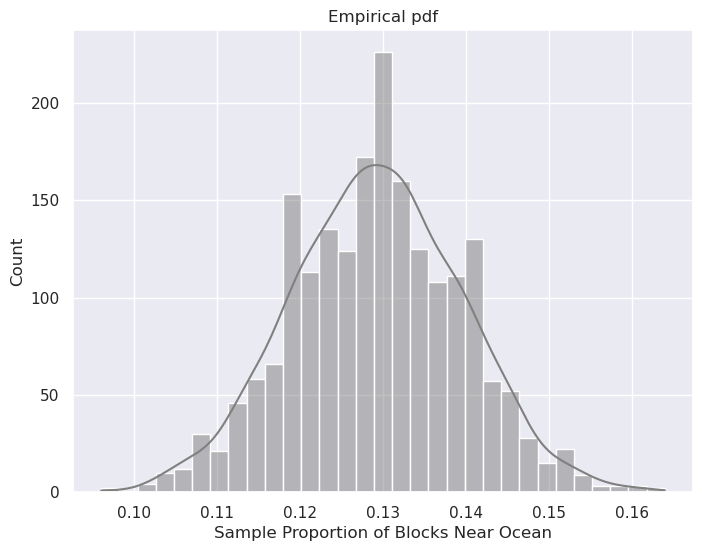

In [41]:
n = 1000 # sample size
m=2000 # repeats

rc = CA_housing.OceanProx

# Let's generate 2000 random samples of size 1000
samples = np.stack([rc.sample(n, replace=False) for _ in range(m)], axis=0)
spr = (samples == "NEAR OCEAN").mean(axis=1)

# show the ditribution of sample propotion. What distribution does it look like?
sns.set_theme(rc={'figure.figsize':(8,6)})

ax = sns.histplot(data=spr,  
             kde=True,
             color='grey')

ax.set_title('Empirical pdf')
ax.set_xlabel('Sample Proportion of Blocks Near Ocean')

plt.show();

## Interval Estimation

We have shown that a point estimator is random and it cannot provide the exact value of a quantity of interest.  But we can construct an *interval estimation* instead based on the sampling distribution. 
An *interval estimator* is often computed by adding and subtracting the {*margin of error* to the point estimator:
\begin{equation}
\hat{\theta}_n\pm\text{me}(\hat{\theta}_n). \tag{13}
\end{equation}
Interval estimator is also random,  changing from one sample to another.

### Interval Estimation for Sample Mean

It is known that sample mean follows a normal distribution if sample size is large,
\begin{equation}
\hat{\mu}_n \sim N\left(\mu,\frac{\sigma}{\sqrt{n}}\right). \tag{14}
\end{equation} 
The interval estimator of $\mu$  can be constructed accordingly.  However,  the standard deviation $\sigma$ is unknown. We replace $\sigma$ with its point estimator,  the sample standard deviation, $S$.  But this introduces another source of uncertainty because $\overline{X}$ is random and it is used by the calculation of $S$.  This additional source of uncertainty can be addressed by using a probability distribution known as $t$ distribution with the degrees of freedom equal to $n-1$,
\begin{equation}
\frac{\overline{X}-\mu}{S/\sqrt{n}}\sim t_{n-1}.  \tag{15}
\end{equation}


When constructing a confidence interval estimator for  $\mu$, the *confidence coefficient* is the probability that the interval estimation procedure will generate an interval that contains the true mean. The *level of significance*, $\alpha$:
\begin{equation}
\alpha =1-\text{confidence coefficient} \tag{16}
\end{equation}

The interval estimator of mean is
\begin{equation}
\overline{X} \pm t_{1-\alpha/2,n-1} \frac{S}{\sqrt{n}}, \tag{17}
\end{equation}
where 
- $\overline{X}$ is sample mean,
- $S$ is sample standard deviation,
- $n$ is sample size, and
- $t_{1-\alpha/2,n-1}$ is the $t$ value providing an area of $\alpha/2$ in the upper tail of the $t$ distribution with $n-1$ degrees of freedom.

If the random sample is from a finite population of size $N$ and the sample size $n$ is relative large, then the interval estimator is adjusted 
\begin{equation}
\overline{X} \pm t_{1-\alpha/2,n-1} \frac{S}{\sqrt{n}}\sqrt{\frac{N-n}{N-1}}. \tag{18}
\end{equation}


Can you generate a simple random sample of size 1,000 and use the sample to estimate the mean of log(MedVal) with  a 95\% confidence interval?

In [61]:
n = 1000 # sample size
alpha = 0.05 # level of significance

samples = np.log(CA_housing.MedVal).sample(n,replace=False) # a simple random sample of size n

# sample mean
x_bar = samples.mean() # sample mean
print(f'Sample mean is {x_bar:.1f}')

# sample standard deviation
s =samples.std(ddof=1) # sample standard deviation
print(f'Sample standard deviation is {s:.3f}')

se = s/np.sqrt(n) # standard error (i.e., the estimated standard deviation of sample mean)
print(f'The standard error (i.e., estimated standard deviation of sample mean) is {se:.3f}')

# t value at 1-alpha/2 and df= n-1 : prob(x<t_val)=1-alpha/2
from scipy.stats import t
df = n-1 # degree of freedom for the standard t distribution = sample size -1
t_val = t(df).ppf(1-alpha/2)
print(f'The t value with {df} degree of freedom at the level of significance {alpha} is {t_val:.3f}')

# margin of error
me = t_val*se
print(f'The margin of error is {me:.3f}')

print(f'The {1-alpha:.2f} confidence interval for the expected median price is {x_bar+me*np.array([-1,1])}')

Sample mean is 12.1
Sample standard deviation is 0.569
The standard error (i.e., estimated standard deviation of sample mean) is 0.018
The t value with 999 degree of freedom at the level of significance 0.05 is 1.962
The margin of error is 0.035
The 0.95 confidence interval for the expected median price is [12.0846 12.1552]


### Interval Estimation of Sample Proportion

It is known that $\overline{p}$, the sample proportion, is an unbiased point estimator of the probability of success for Berboulli distribution.  Sample proportion follows a normal distribution approximately,
\begin{equation}
\overline{p}\sim N\left(p,  \sqrt{\frac{p(1-p)}{n}}\right).  \tag{19}
\end{equation}
We can construct an interval estimator for $p$ according to the sampling distribution of sample proportion.  However,  the parameter $p$ is unknown. We replace $p$ with the a point estimator, $\overline{p}$, to obtain the interval estimator with $(1-\alpha)$ confidence of including the true parameter $p$:
\begin{equation}
\overline{p}\pm z_{1-\alpha/2}\sqrt{\frac{\overline{p}(1-\overline{p})}{n}} \tag{20}
\end{equation}
where 
- $\overline{p}$ is sample proportion,
- $n$ is sample size, and
- $z_{1-\alpha/2}$ is the z value providing an area of $\alpha/2$ in the upper tail of the standard normal distribution. 

If the population size $N$ is finite, and the sample size $n$ is relative large, the interval estimator needs to be adjusted for that reason:
\begin{equation}
\overline{p}\pm z_{1-\alpha/2}\sqrt{\frac{\overline{p}(1-\overline{p})}{n}}\sqrt{\frac{N-n}{N-1}}. \tag{21}
\end{equation}

Can you please generate a random sample of size 1,000 and use the sample to construct a 95\% confidence interval estimate for the probability that a randomly selected block is ``NEAR OCEAN"?

In [60]:
# let p = the proportion of blocks "NEAR OCEAN". We study this variable using a sample of size 1000

n = 1000 # sample size
alpha = 0.05 # level of significance

samples = CA_housing.OceanProx.sample(n, replace=False) # a simple random sample of size n

# sample proportion
p_bar = (samples=='NEAR OCEAN').mean()
print(f'The sample proportion is {p_bar:.2f}')

# sample standard deviation of p
s =np.sqrt(p_bar*(1-p_bar)) # estimated sample standard deviation of x, where x="NEAR OCEAN" with probability p follow Bernoulli distribution
se = s/np.sqrt(n) # standard error (i.e., the estimated standard deviation of sample proportion)
print(f'The standard error is {se:.3f}')

# z value at 1-alpha/2
from scipy.stats import norm
z_val = norm.ppf(1-alpha/2)
print(f'The z value at the level of significane {alpha:.2} is {z_val:.3f}')

me = se*z_val # margin of error
print(f'The margin of error is {me:.3f}')

print(f'The {1-alpha} confidence interval of the "NEAR OCEAN" blocks in proportion is {p_bar+me.round(3)*np.array([-1,1])}')

The sample proportion is 0.13
The standard error is 0.011
The z value at the level of significane 0.05 is 1.960
The margin of error is 0.021
The 0.95 confidence interval of the "NEAR OCEAN" blocks in proportion is [0.112 0.154]


## Estimation of Nonparametric Distribution

In this section,  we review the nonparametric estimation of cumulative distribution function (CDF) and functions of CDF.

### Empirical Distribution Function

Let $X_1,\dots, X_n\sim F$ be independent and identically distributed (iid) sample. $F$ is a distribution of a real-valued variable. We can estimate $F$ with the *empirical distribution function* :
\begin{equation}
\widehat{F}_n(x) = \frac{\sum_{i=1}^n 1\{X_i\leq x\}}{n}. \tag{22}
\end{equation}
where
\begin{equation}
1\{X_i\leq x\}=\left\{
\begin{array}{ll}
1, &\quad \text{if } X_i\leq x,\\
0, &\quad \text{otherwise}.
\end{array}
\right. \tag{23}
\end{equation}

### Sampling Distribution of Empirical CDF

At any fixed point $x$, the point estimator of empirical distribution $\widehat{F}_n(x)$ is random. 

\begin{equation}
\text{E}[\widehat{F}_n(x)]=F(x). \tag{24}
\end{equation}

\begin{equation}
\text{Var}[\widehat{F}_n(x)]=\frac{F(x)(1-F(x))}{n} \tag{25}
\end{equation} 

### Confidence Interval Estimation

We can construct an interval estimation for $F(x)$ based on Dvoretzky-Kiefer-Wolfowitz (DKW) inequality. The nonparametric ($1-\alpha$) confidence interval for $F$ is
\begin{equation}
\begin{aligned}
L(x) = \max\{\widehat{F}_n(x)-\epsilon_n,0\},\\
U(x) = \min\{\widehat{F}_n(x)+\epsilon_n,1\},
\end{aligned}. \tag{26}
\end{equation}
wherein the margin of error is
\begin{equation}
\epsilon_n = \sqrt{\frac{1}{2n}\log\left(\frac{2}{a}\right)}. \tag{27}
\end{equation}

We generate a random sample of ``MedVal" and use the sample to get the empirical CDF and the 95\% confidence interval for its distribution.

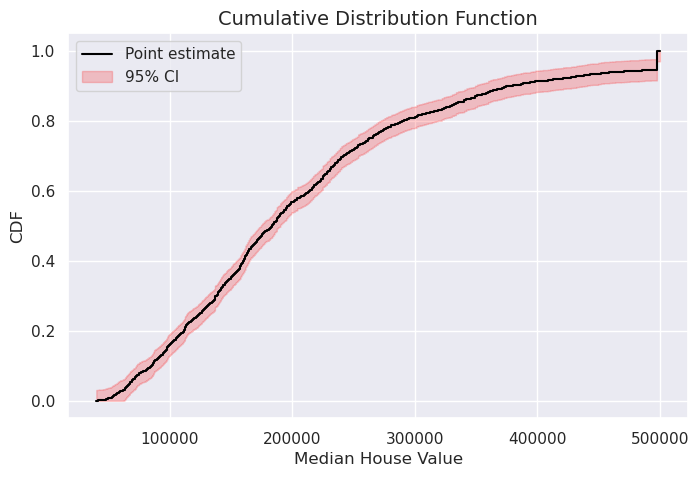

In [123]:
n = 2000
MedVal_sample = CA_housing.MedVal.sample(n, replace=False)

# define the domain for MedVal
# here we equally spaced the range of log(MedVal) to get bins and then convert the bins in the domain for MedVal. 
# This is because the long tail of MedVal would cause an issue of not having enough samples in the long detail.  
MedVal_domain = np.exp(np.linspace(np.log(MedVal_sample.min()),np.log(MedVal_sample.max()+100), 500))

# initialize the cumulative distribution, and the lower and upper bounds of its confidence interval
F_MedVal = F_MedVal_lb = F_MedVal_ub = np.empty(len(MedVal_domain))

# point estimate of CDF
for i in range(len(MedVal_domain)):
    F_MedVal[i]= (MedVal_sample <= MedVal_domain[i]).mean()

# (1-alpha) confidence interval of CDF
alpha = 0.05
se_MedVal = np.sqrt(0.5/n*np.log(2/alpha))

F_MedVal_lb = np.maximum(0, F_MedVal-se_MedVal)
F_MedVal_ub = np.minimum(1, F_MedVal+se_MedVal)

# visualize the estimation
plt.figure(figsize=(8, 5)) 

plt.step(MedVal_domain, 
         F_MedVal, 
         where='pre', 
         color='black', 
         label='Point estimate'
        )

plt.fill_between(MedVal_domain, F_MedVal_lb, F_MedVal_ub, 
                 step='pre', 
                 color='red', 
                 alpha=0.2, 
                 label='95% CI'
                )

plt.xlabel('Median House Value',fontsize=12)
plt.ylabel('CDF',fontsize=12)
plt.title('Cumulative Distribution Function',fontsize=14)

plt.legend()

plt.show();